In [1]:
import glob
import pandas as pd
import os
import random
import sys



from itertools import combinations
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
#from statsmodels.stats.inter_rater import fleiss_kappa


## Read in annotations per annotator


In [2]:
def take_df_sample(filepath, sample_nr):
    df = pd.read_excel(filepath, engine='openpyxl')
    #df = pd.read_csv(filepath, sep=';')
    frames = [df[df["Sample_nr"] == sample_nr[0]], df[df["Sample_nr"] == sample_nr[1]], df[df["Sample_nr"] == sample_nr[2]], df[df["Sample_nr"] == sample_nr[3]]]
    #print(sample_nr)
    result = pd.concat(frames)
    return result
        
def calculate_agreement(annotator_a, annotator_b):
    counter = -1
    disagreement_list = []
    labels_a = []
    labels_b = []
    #print(annotator_a.shape)
    #print(annotator_b.shape)
    frames_a = [annotator_a[30:50], annotator_a[80:100], annotator_a[130:150], annotator_a[180:200]]
    frames_b = [annotator_b[0:20], annotator_b[50:70], annotator_b[100:120], annotator_b[150:170]]
    
    subset_a = pd.concat(frames_a)
    subset_b = pd.concat(frames_b)
    
    overlap = [anno_a == anno_b for anno_a, anno_b in zip(subset_a["SA Label"].tolist(), subset_b["SA Label"].tolist())]
    
    for anno_a, anno_b in zip(subset_a["SA Label"].tolist(), subset_b["SA Label"].tolist()):
        counter += 1
        labels_a.append(anno_a)
        labels_b.append(anno_b)
        if anno_a != anno_b:
            #print(counter)
            disagreement_list.append(subset_a.iloc[counter][0])


    
    agree = sum(overlap)
    #disagree = overlap.count("False")
    perc_agreement = agree / len(overlap)
    
    cohen_kappa = cohen_kappa_score(subset_a["SA Label"], subset_b["SA Label"])
    
    # print(subset_a["cleaned_text"].tolist() == subset_b["cleaned_text"].tolist()) #check if df's are the same
    
    #print(subset_a.shape)
    #print(subset_b.shape)
    
    return subset_a, subset_b, labels_a, labels_b, disagreement_list, perc_agreement, cohen_kappa

In [3]:
def return_disagreement(subset_a, subset_b, disagreement_list):
    for index in disagreement_list:
        print(f"Index: {index}\n", subset_a.loc[index]['cleaned_text'], f"annotator a: {subset_a.loc[index]['SA Label']}", f"annotator b: {subset_b.loc[index]['SA Label']} \n")


In [4]:
##annotator 1:
annotator_1 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [1,10,19,28])

##annotator 2:
annotator_2 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [2,11,20,29])

##annotator 3:
annotator_3 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [3,12,21,30])

##annotator 4:
annotator_4 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [4,13,22,31])

##annotator 5:
annotator_5 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [5,14,23,32])

##annotator 6:
annotator_6 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [6,15,24, 33]) ##add 33

##annotator 7:
annotator_7 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [7,16,25, 34]) ##add 34

##annotator 8:
annotator_8 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [8,17,26,35])

##annotator 9:
annotator_9 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [9,18,27,36])

##annotator 10:
annotator_10 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [37,46,55,64]) 

##annotator 11:
annotator_11 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [38,47,56,65])

##annotator 12:
annotator_12 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [39,48,57,66])

##annotator 13:
annotator_13 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [40,49,58,67])

##annotator 14:
annotator_14 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [41,50,59,68])

##annotator 15:
annotator_15 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [42,51,60,69])

##annotator 16:
annotator_16 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [43,52,61,70])

##annotator 17:
annotator_17 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [44,53,62,71])

##annotator 18:
annotator_18 = take_df_sample("Annotatie_document_merged_ingevuld.xlsx", [45,54,63,72])


## Agreement for annotators 1-9

In [5]:
dis_ann1_2, per_ann1_2, kappa_ann1_2 = calculate_agreement(annotator_1, annotator_2)[-3:]
dis_ann2_3, per_ann2_3, kappa_ann2_3 = calculate_agreement(annotator_2, annotator_3)[-3:]
dis_ann3_4, per_ann3_4, kappa_ann3_4 = calculate_agreement(annotator_3, annotator_4)[-3:]
dis_ann4_5, per_ann4_5, kappa_ann4_5 = calculate_agreement(annotator_4, annotator_5)[-3:]
dis_ann5_6, per_ann5_6, kappa_ann5_6= calculate_agreement(annotator_5, annotator_6)[-3:]
dis_ann6_7, per_ann6_7, kappa_ann6_7 = calculate_agreement(annotator_6, annotator_7)[-3:]
dis_ann7_8, per_ann7_8, kappa_ann7_8 = calculate_agreement(annotator_7, annotator_8)[-3:]
dis_ann8_9, per_ann8_9, kappa_ann8_9= calculate_agreement(annotator_8, annotator_9)[-3:]
dis_ann9_10, per_ann9_10, kappa_ann9_10 = calculate_agreement(annotator_9, annotator_10)[-3:]
dis_ann10_11, per_ann10_11, kappa_ann10_11 = calculate_agreement(annotator_10, annotator_11)[-3:]
dis_ann11_12, per_ann11_12, kappa_ann11_12 = calculate_agreement(annotator_11, annotator_12)[-3:]
dis_ann12_13, per_ann12_13, kappa_ann12_13 = calculate_agreement(annotator_12, annotator_13)[-3:]
dis_ann13_14, per_ann13_14, kappa_ann13_14 = calculate_agreement(annotator_13, annotator_14)[-3:]
dis_ann14_15, per_ann14_15, kappa_ann14_15 = calculate_agreement(annotator_14, annotator_15)[-3:]
dis_ann15_16, per_ann15_16, kappa_ann15_16 = calculate_agreement(annotator_15, annotator_16)[-3:]
dis_ann16_17, per_ann16_17, kappa_ann16_17 = calculate_agreement(annotator_16, annotator_17)[-3:]
dis_ann17_18, per_ann17_18, kappa_ann17_18 = calculate_agreement(annotator_17, annotator_18)[-3:]

In [6]:
agreement_list = [[per_ann1_2, kappa_ann1_2], [per_ann2_3, kappa_ann2_3],[per_ann3_4, kappa_ann3_4],[per_ann4_5, kappa_ann4_5],[per_ann5_6, kappa_ann5_6],[per_ann6_7, kappa_ann6_7],[per_ann7_8, kappa_ann7_8],[per_ann8_9, kappa_ann8_9],[per_ann9_10, kappa_ann9_10],[per_ann10_11, kappa_ann10_11],[per_ann11_12, kappa_ann11_12],[per_ann12_13, kappa_ann12_13],[per_ann13_14, kappa_ann13_14],[per_ann14_15, kappa_ann14_15],[per_ann15_16, kappa_ann15_16],[per_ann16_17, kappa_ann16_17],[per_ann17_18, kappa_ann17_18]]
counter_a = 0
counter_b = 1


for agreement in agreement_list:
    counter_a += 1
    counter_b += 1
    print(f' percentage of agreement, cohens kappa for annotator {counter_a} and {counter_b}\n percentage: {agreement[0]} \t kappa: {agreement[1]}\n\n')

 percentage of agreement, cohens kappa for annotator 1 and 2
 percentage: 0.8 	 kappa: 0.6811955168119552


 percentage of agreement, cohens kappa for annotator 2 and 3
 percentage: 0.7 	 kappa: 0.5161290322580645


 percentage of agreement, cohens kappa for annotator 3 and 4
 percentage: 0.75 	 kappa: 0.5026422132421511


 percentage of agreement, cohens kappa for annotator 4 and 5
 percentage: 0.5 	 kappa: 0.13700107874865164


 percentage of agreement, cohens kappa for annotator 5 and 6
 percentage: 0.4375 	 kappa: 0.1497401983939537


 percentage of agreement, cohens kappa for annotator 6 and 7
 percentage: 0.75 	 kappa: 0.5863495346432265


 percentage of agreement, cohens kappa for annotator 7 and 8
 percentage: 0.65 	 kappa: 0.49090909090909096


 percentage of agreement, cohens kappa for annotator 8 and 9
 percentage: 0.5375 	 kappa: 0.2935560859188544


 percentage of agreement, cohens kappa for annotator 9 and 10
 percentage: 0.325 	 kappa: -0.17807472047995665


 percentage 

In [7]:
print(per_ann5_6, kappa_ann5_6)
for dis in dis_ann5_6:
    print(dis)
print(len(dis_ann5_6))

#return_disagreement(calculate_agreement(annotator_2, annotator_3)[0], calculate_agreement(annotator_2, annotator_3)[1], calculate_agreement(annotator_2, annotator_3)[2])

0.4375 0.1497401983939537
36184.0
29155.0
420.0
5715.0
21938.0
36482.0
5925.0
5254.0
11168.0
17250.0
3213.0
1580.0
30138.0
4135.0
6746.0
26265.0
28991.0
1811.0
25520.0
18069.0
9576.0
9594.0
29251.0
18992.0
6780.0
27849.0
21224.0
12622.0
33127.0
33451.0
12695.0
3719.0
3791.0
26513.0
34749.0
10529.0
464.0
23016.0
10170.0
35236.0
25726.0
3797.0
36559.0
32366.0
13114.0
45


### Plot disagreement per pair

In [8]:
conversion_dict = {' ':'', 'informeren/motiveren': 'informative/persuasive', 'opdragen/instrueren':'directive/instructive', 'beloven/dreigen':'commissive', 'officiële verandering/toekenning':'declarative','overig':'miscellaneous', ' overig': 'miscellaneous'}
 

In [122]:

def cm_heatmap_annotator_pairs(annotator_a, annotator_b, name_x="a", name_y="b"):
    transl_labels_a = []
    transl_labels_b = []
       
    labels_a = calculate_agreement(annotator_a, annotator_b)[2]
    labels_b = calculate_agreement(annotator_a, annotator_b)[3]
    
    for label_a in labels_a:
        #print(label)
        #print(conversion_dict[label])
        transl_labels_a.append(str(conversion_dict[label_a]))
        
    for label_b in labels_b:
        #print(label_b)
        transl_labels_b.append(str(conversion_dict[label_b]))
    
    labels=['informative/persuasive','directive/instructive', 'commissive', 'declarative', 'miscellaneous'] ##add declarative later
    x = labels
    y = labels
    cm = confusion_matrix(transl_labels_a, transl_labels_b, normalize=None, labels=labels)
    #print(cm)

    #z_text = [[str(y) for y in x] for x in cm]

    #print(cm)
    #fig = ff.create_annotated_heatmap(cm, x=x, y=y, annotation_text=z_text, colorscale='Viridis')
    #fig.show("notebook")
    
    plt.figure(figsize = (10,7))
    plot = sns.heatmap(cm, annot=True, xticklabels=x, yticklabels=y, cmap='Blues')
    plot.set_xlabel(f"Annotations from annotator {name_x}")
    plot.set_ylabel(f"Annotations from annotator {name_y}")
    #plot.set_title(f"Disagreement between annotators {name_x} & {name_y}")
    plt.tight_layout(pad=2)
    return plot, cm

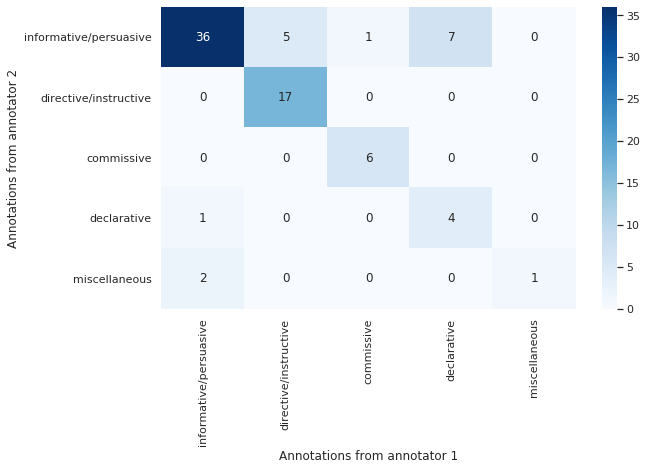

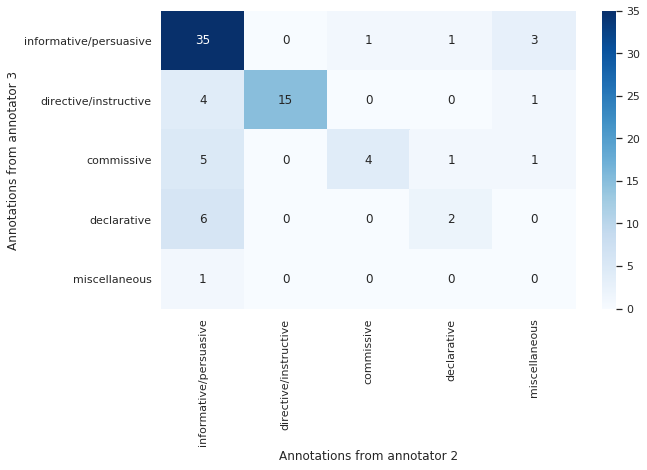

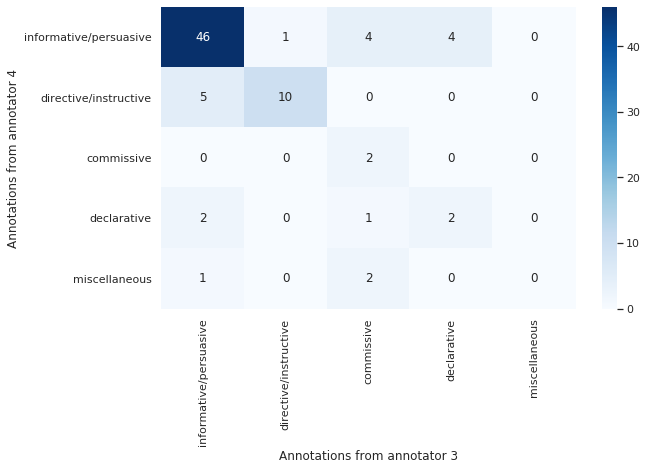

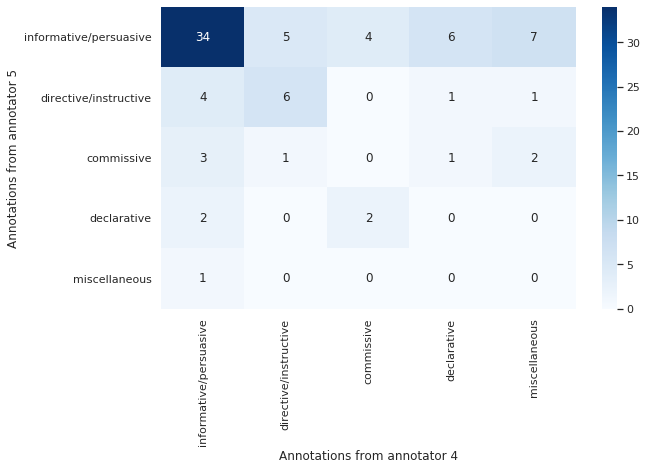

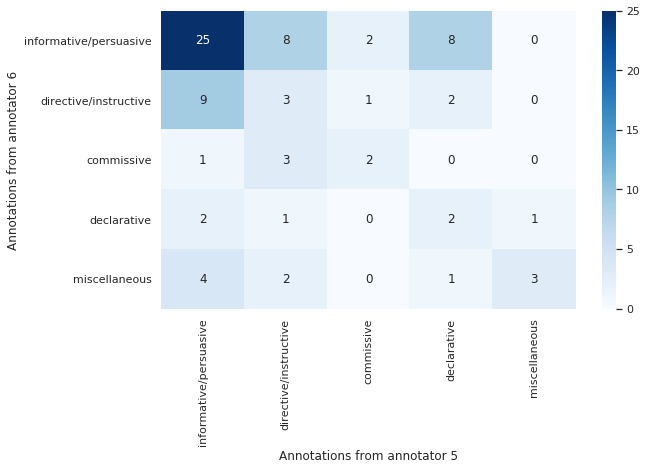

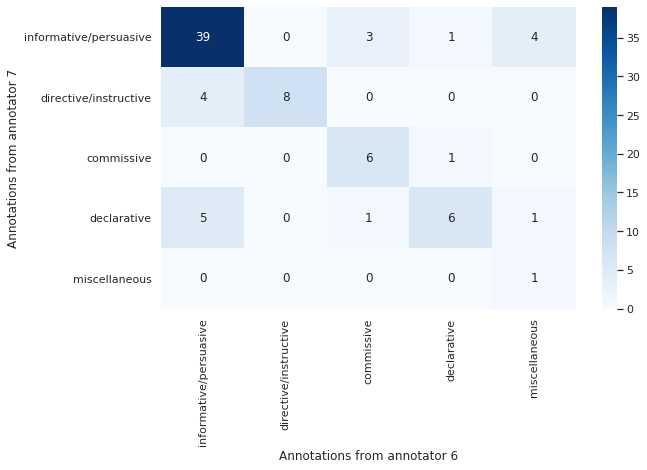

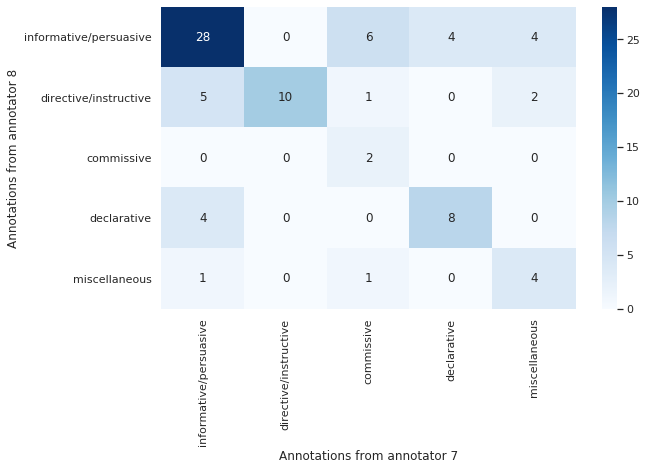

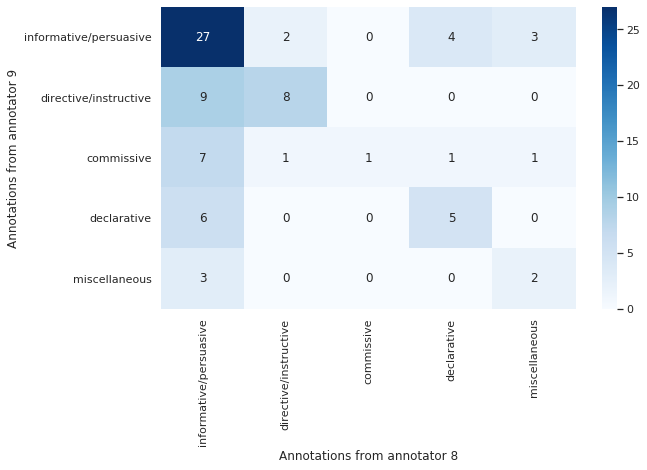

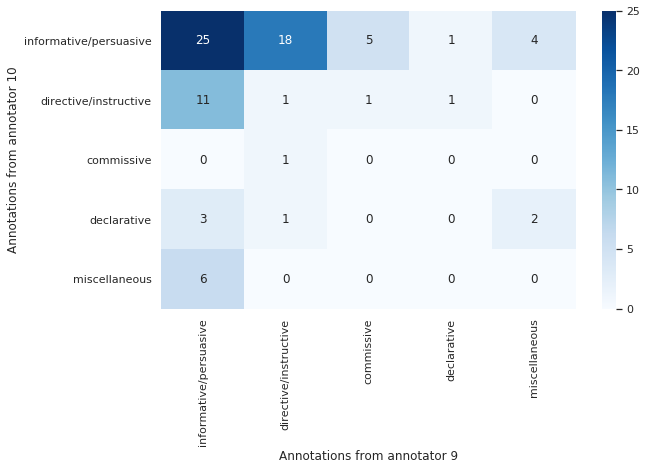

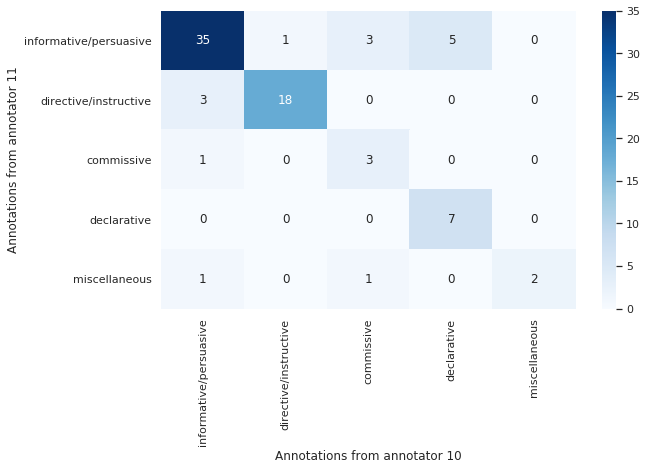

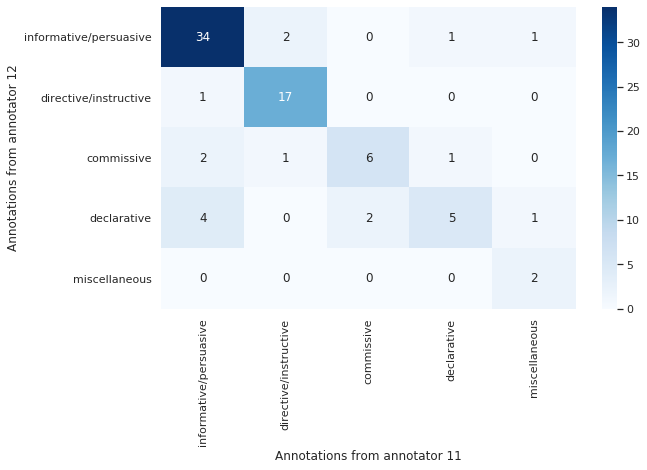

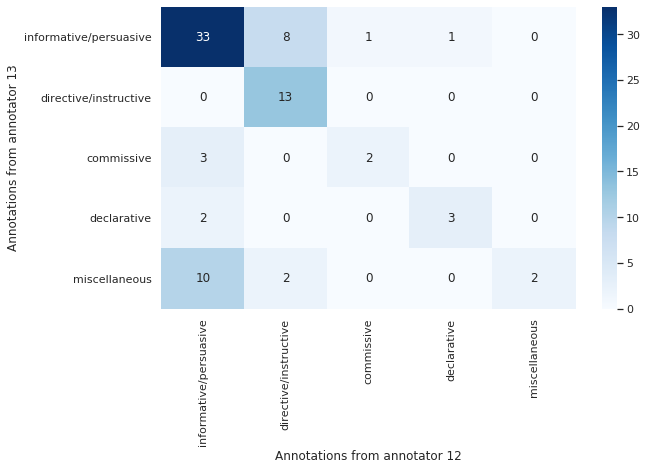

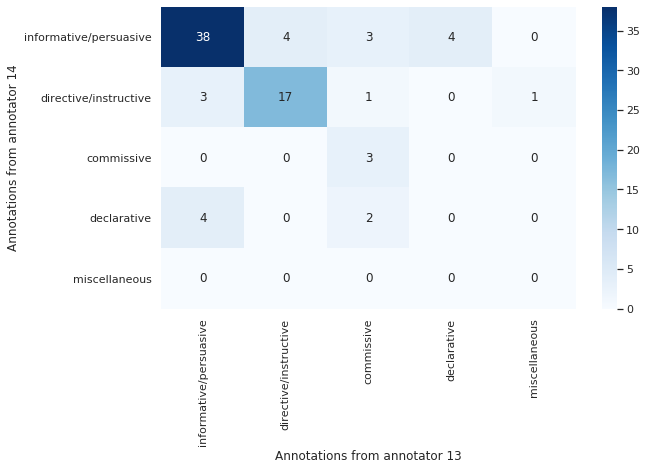

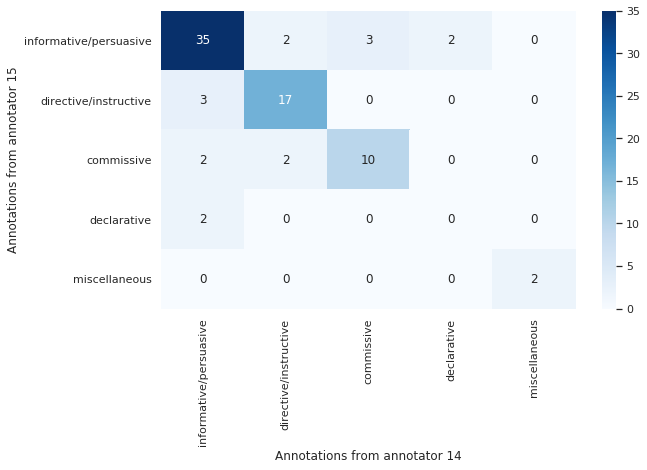

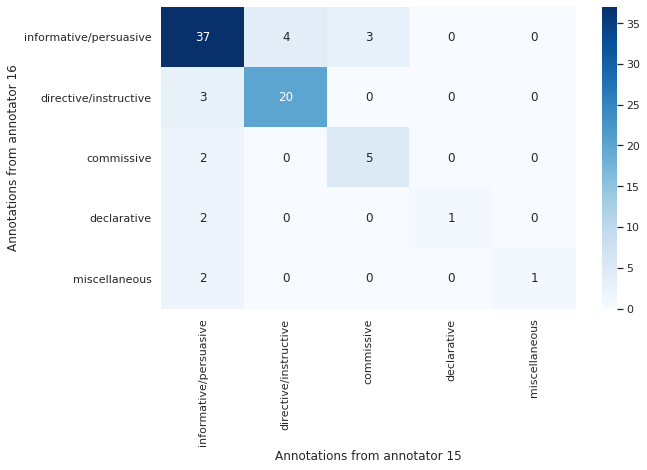

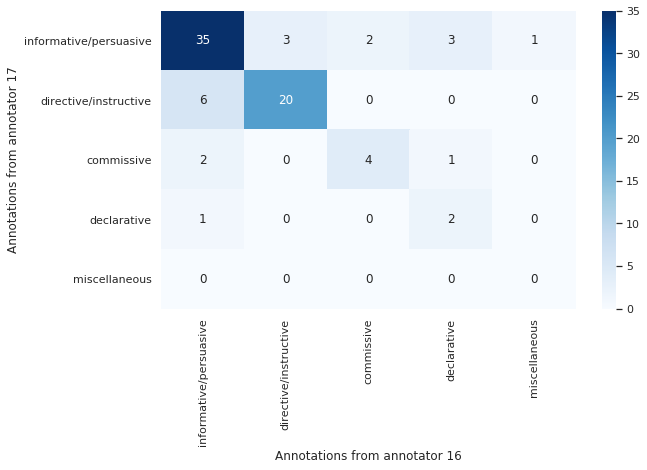

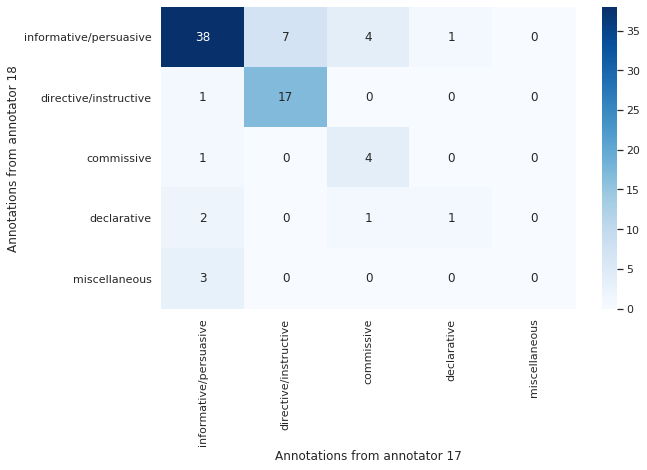

In [123]:
cm_heatmap_annotator_pairs(annotator_1, annotator_2, name_x="1", name_y="2")[0].figure.savefig("pics/dis1_2.png")
cm_heatmap_annotator_pairs(annotator_2, annotator_3, name_x="2", name_y="3")[0].figure.savefig("pics/dis2_3.png")
cm_heatmap_annotator_pairs(annotator_3, annotator_4, name_x="3", name_y="4")[0].figure.savefig("pics/dis3_4.png")
cm_heatmap_annotator_pairs(annotator_4, annotator_5, name_x="4", name_y="5")[0].figure.savefig("pics/dis4_5.png")
cm_heatmap_annotator_pairs(annotator_5, annotator_6, name_x="5", name_y="6")[0].figure.savefig("pics/dis5_6.png")
cm_heatmap_annotator_pairs(annotator_6, annotator_7, name_x="6", name_y="7")[0].figure.savefig("pics/dis6_7.png")
cm_heatmap_annotator_pairs(annotator_7, annotator_8, name_x="7", name_y="8")[0].figure.savefig("pics/dis7_8.png")
cm_heatmap_annotator_pairs(annotator_8, annotator_9, name_x="8", name_y="9")[0].figure.savefig("pics/dis8_9.png")
cm_heatmap_annotator_pairs(annotator_9, annotator_10, name_x="9", name_y="10")[0].figure.savefig("pics/dis9_10.png")
cm_heatmap_annotator_pairs(annotator_10, annotator_11, name_x="10", name_y="11")[0].figure.savefig("pics/dis10_11.png")
cm_heatmap_annotator_pairs(annotator_11, annotator_12, name_x="11", name_y="12")[0].figure.savefig("pics/dis11_12.png")
cm_heatmap_annotator_pairs(annotator_12, annotator_13, name_x="12", name_y="13")[0].figure.savefig("pics/dis12_13.png")
cm_heatmap_annotator_pairs(annotator_13, annotator_14, name_x="13", name_y="14")[0].figure.savefig("pics/dis13_14.png")
cm_heatmap_annotator_pairs(annotator_14, annotator_15, name_x="14", name_y="15")[0].figure.savefig("pics/dis14_15.png")
cm_heatmap_annotator_pairs(annotator_15, annotator_16, name_x="15", name_y="16")[0].figure.savefig("pics/dis15_16.png")
cm_heatmap_annotator_pairs(annotator_16, annotator_17, name_x="16", name_y="17")[0].figure.savefig("pics/dis16_17.png")
cm_heatmap_annotator_pairs(annotator_17, annotator_18, name_x="17", name_y="18")[0].figure.savefig("pics/dis17_18.png")

array([[580,  70,  45,  53,  27],
       [ 71, 217,   4,   4,   5],
       [ 29,   9,  60,   6,   4],
       [ 48,   2,   9,  48,   5],
       [ 35,   4,   4,   1,  20]])

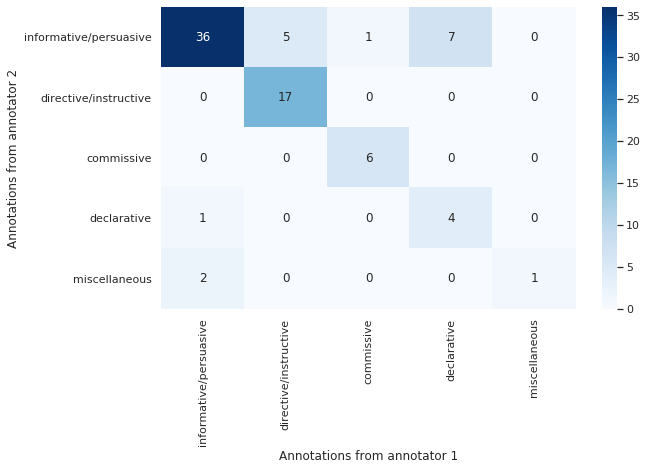

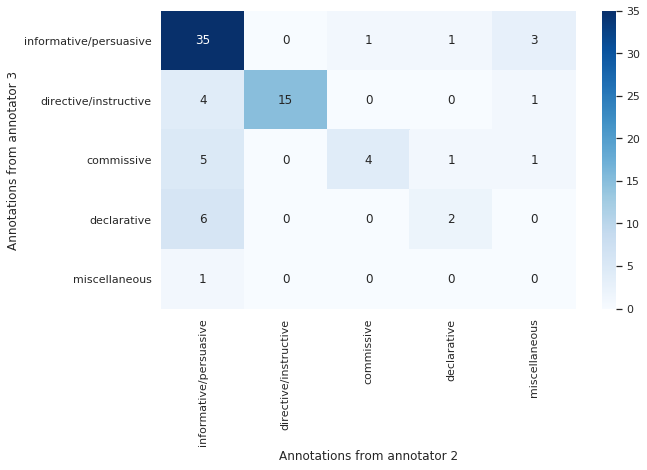

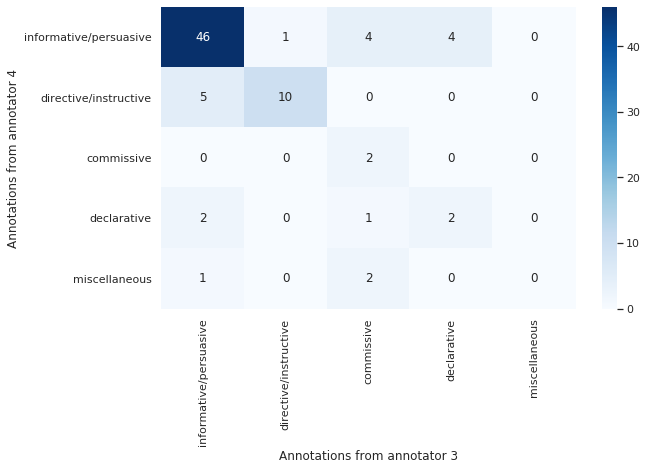

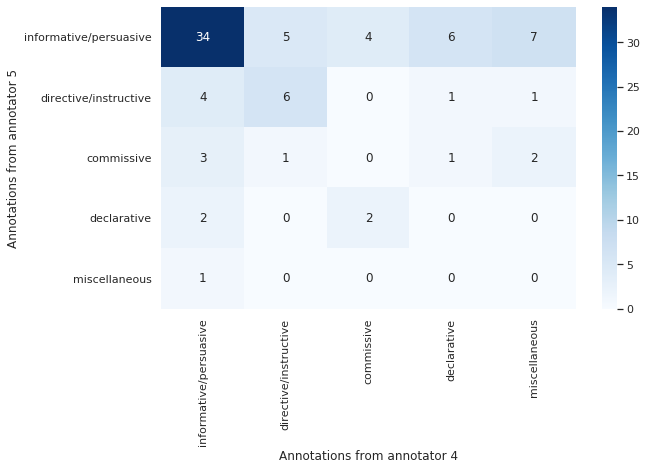

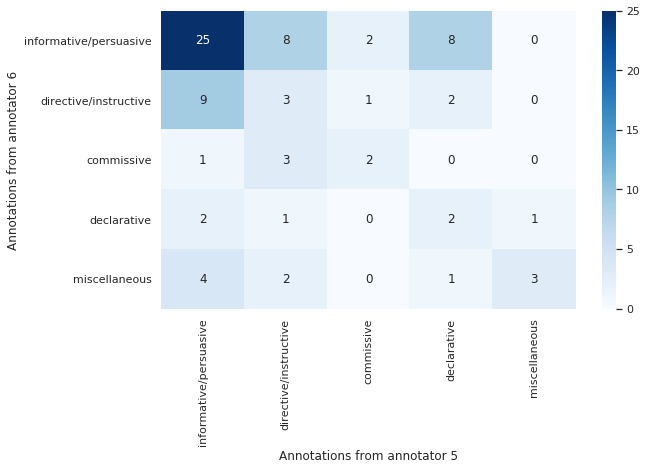

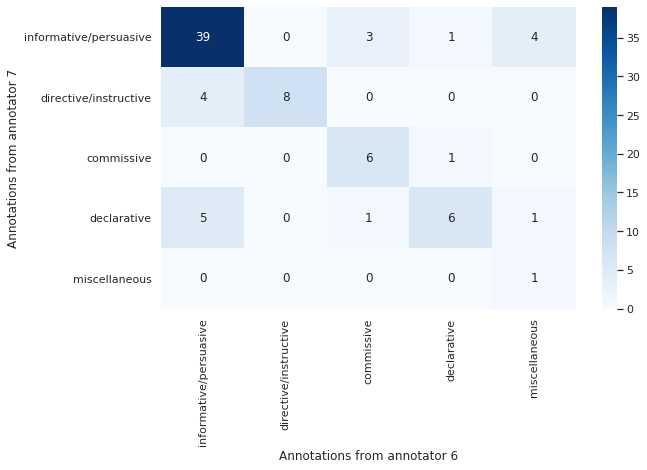

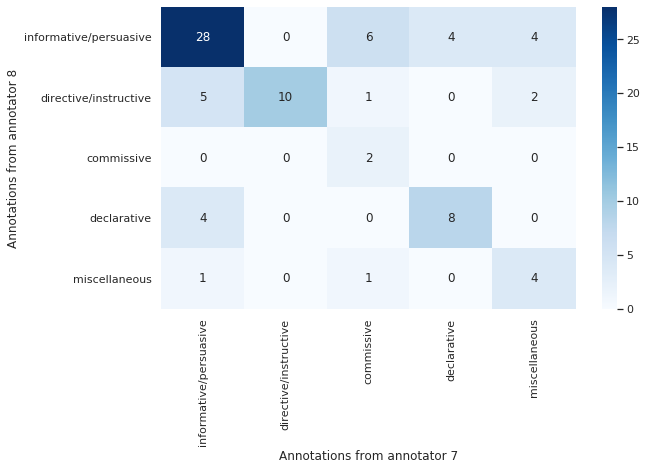

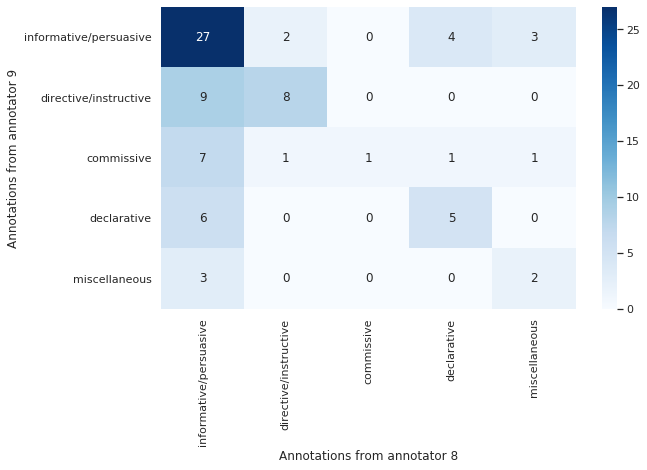

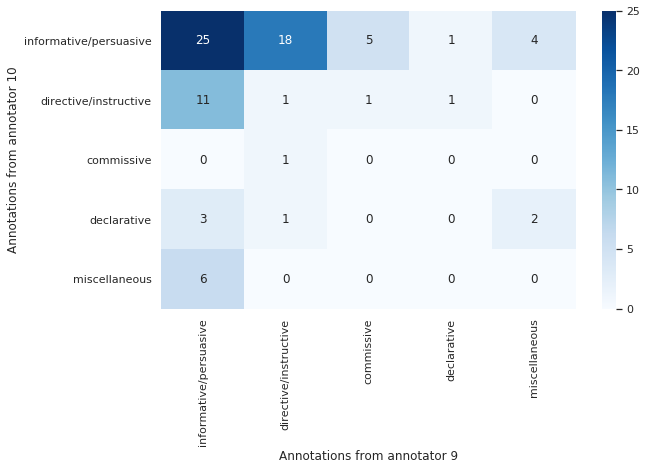

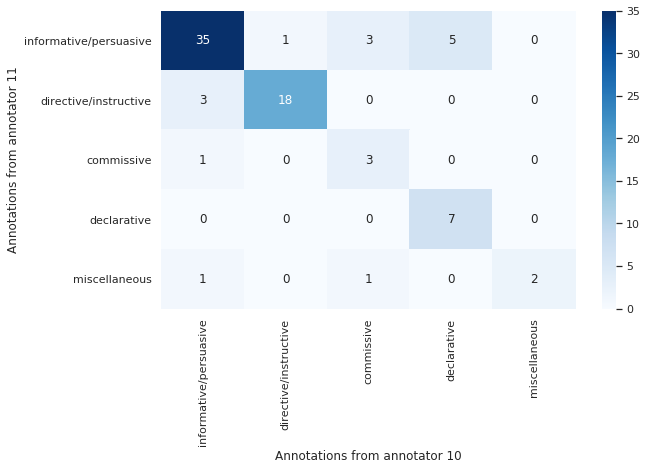

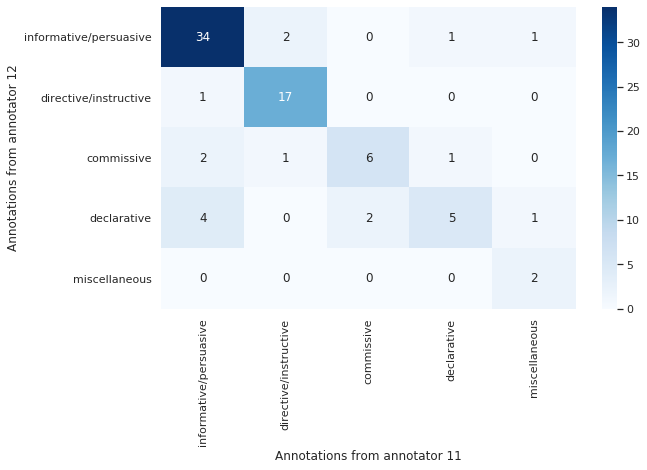

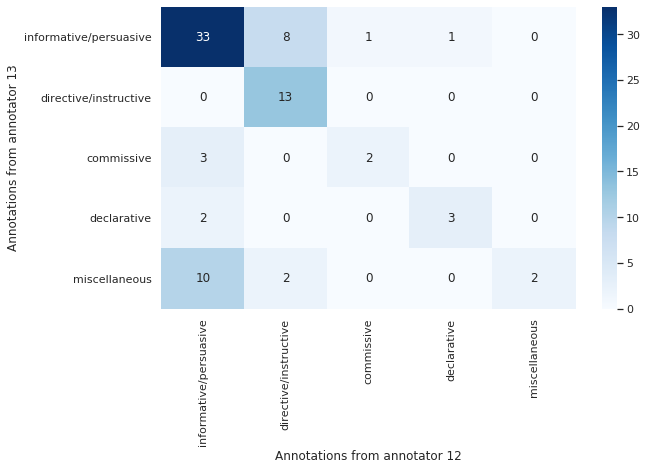

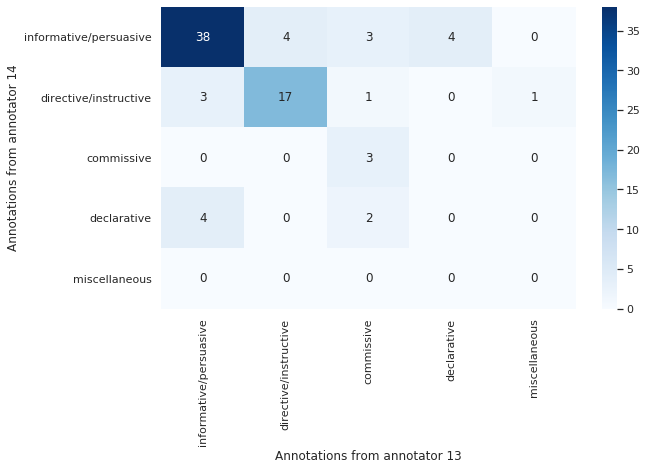

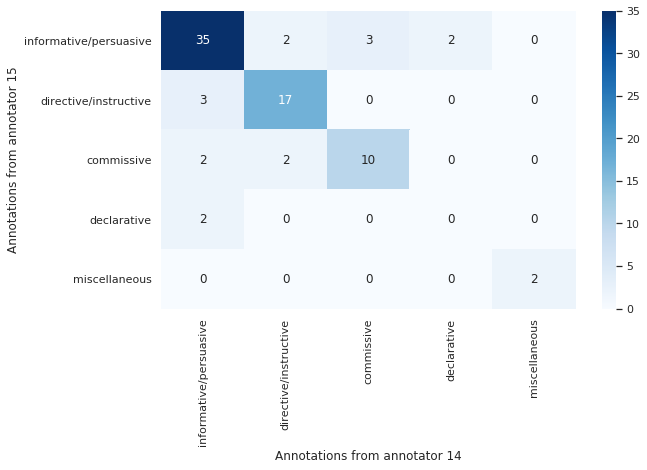

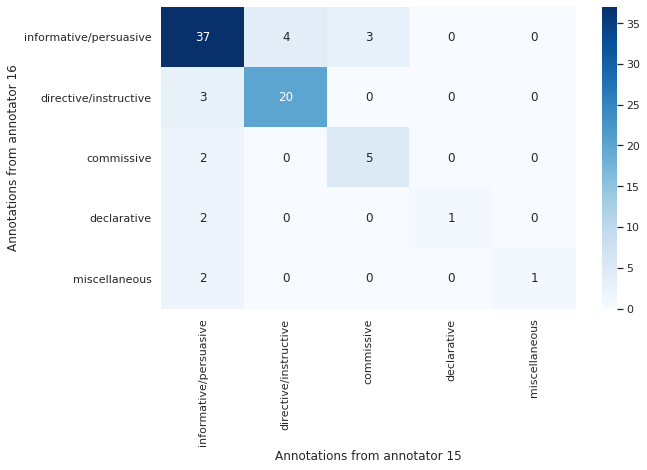

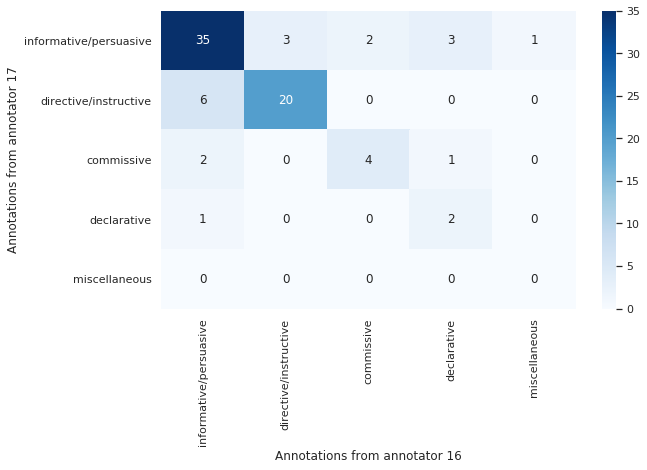

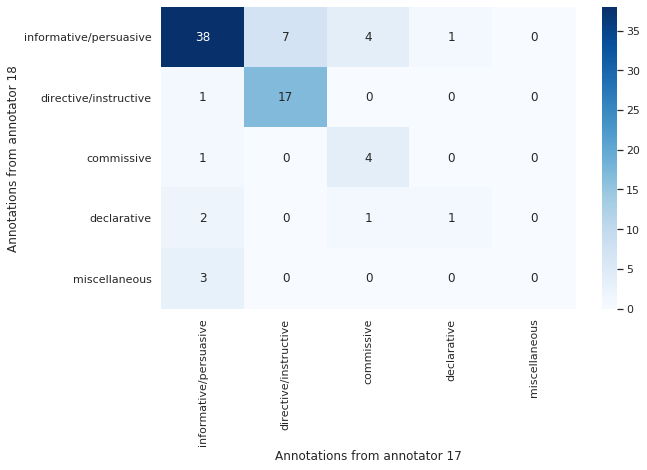

In [124]:
total_cm = cm_heatmap_annotator_pairs(annotator_1, annotator_2, name_x="1", name_y="2")[1] + cm_heatmap_annotator_pairs(annotator_2, annotator_3, name_x="2", name_y="3")[1] + cm_heatmap_annotator_pairs(annotator_3, annotator_4, name_x="3", name_y="4")[1] + cm_heatmap_annotator_pairs(annotator_4, annotator_5, name_x="4", name_y="5")[1] + cm_heatmap_annotator_pairs(annotator_5, annotator_6, name_x="5", name_y="6")[1] + cm_heatmap_annotator_pairs(annotator_6, annotator_7, name_x="6", name_y="7")[1] + cm_heatmap_annotator_pairs(annotator_7, annotator_8, name_x="7", name_y="8")[1] + cm_heatmap_annotator_pairs(annotator_8, annotator_9, name_x="8", name_y="9")[1] + cm_heatmap_annotator_pairs(annotator_9, annotator_10, name_x="9", name_y="10")[1] + cm_heatmap_annotator_pairs(annotator_10, annotator_11, name_x="10", name_y="11")[1] + cm_heatmap_annotator_pairs(annotator_11, annotator_12, name_x="11", name_y="12")[1] + cm_heatmap_annotator_pairs(annotator_12, annotator_13, name_x="12", name_y="13")[1] + cm_heatmap_annotator_pairs(annotator_13, annotator_14, name_x="13", name_y="14")[1] + cm_heatmap_annotator_pairs(annotator_14, annotator_15, name_x="14", name_y="15")[1] + cm_heatmap_annotator_pairs(annotator_15, annotator_16, name_x="15", name_y="16")[1] + cm_heatmap_annotator_pairs(annotator_16, annotator_17, name_x="16", name_y="17")[1] + cm_heatmap_annotator_pairs(annotator_17, annotator_18, name_x="17", name_y="18")[1]

total_cm

[[580  70  45  53  27]
 [ 71 217   4   4   5]
 [ 29   9  60   6   4]
 [ 48   2   9  48   5]
 [ 35   4   4   1  20]]



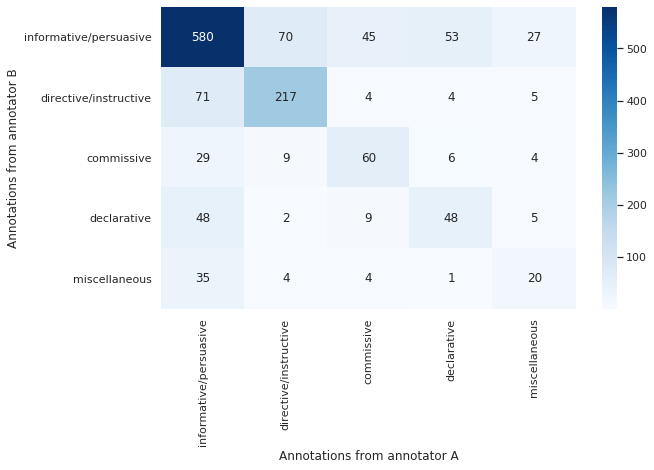

In [125]:
labels=['informative/persuasive','directive/instructive', 'commissive', 'declarative', 'miscellaneous']

plt.figure(figsize = (10,7))


print(total_cm)
print()

plot = sns.heatmap(total_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues', fmt='d') 
plot.set_xlabel(f"Annotations from annotator A")
plot.set_ylabel(f"Annotations from annotator B")
plt.tight_layout(pad=2)
plot.figure.savefig('pics/total_agreement.png')

### Make one list of all cases of disagreement

In [13]:
disagreement_list = [dis_ann1_2, dis_ann2_3, dis_ann3_4, dis_ann4_5, dis_ann5_6, dis_ann6_7, dis_ann7_8, dis_ann8_9, dis_ann9_10, dis_ann10_11, dis_ann11_12, dis_ann12_13, dis_ann13_14, dis_ann14_15, dis_ann15_16, dis_ann16_17, dis_ann17_18]

In [14]:
total_disagreement_list = []

for pair in disagreement_list:
    for sentence_index in pair:
        total_disagreement_list.append(sentence_index)
        

In [15]:
disagreement_list[0]

[1524.0,
 31884.0,
 33592.0,
 13307.0,
 28023.0,
 17208.0,
 18216.0,
 34756.0,
 18984.0,
 32219.0,
 33340.0,
 24769.0,
 13865.0,
 30356.0,
 4585.0,
 10627.0]

### Prepara dataset for solving disagreement

In [16]:
annotations = pd.read_excel("Annotatie_document_merged_ingevuld.xlsx", engine='openpyxl')
annotations.iloc[0]

Unnamed: 0                                                      14446
FileCode                                                           IV
FileName                                                NBK108_00.xml
FileCaption                                                 NBK108_00
Sample_nr                                                           1
Text                U hebt Uw klant naam_belastingplichtige , adre...
len_text                                                         1952
whitespace_count                                                  279
newline_count                                                      28
perc_newline                                                     1.43
perc_whitespace                                                 14.29
total_nr_sent                                                      19
sent_index_in_tb                                                    6
cleaned_text        Het bedrag van de aanslag minus de betalingsko...
SA Label            

In [17]:
disagreement_series_list = []
counter = 0

for number in total_disagreement_list:
    for row, cols in annotations.iterrows():
        counter += 1
        #print(cols)
        if cols[0] == number:
            #print(row)
            disagreement_series_list.append(cols)

## Show labels with the most disagreement

### Make one df with all cases of disagreement 

In [19]:
df = pd.DataFrame(disagreement_series_list)
df = df.drop_duplicates(subset= 'cleaned_text',keep='first')
df = df.sort_values('Sample_nr')
df.shape

(438, 15)

In [20]:
df.iloc[0]

Unnamed: 0                                                       1524
FileCode                                                           IV
FileName                                                   NCV113.xml
FileCaption         NCV113 Meded pandrecht en inning verpande vord...
Sample_nr                                                           1
Text                Betreft: Mededeling pandrecht en inning verpan...
len_text                                                         1724
whitespace_count                                                  385
newline_count                                                      85
perc_newline                                                     4.93
perc_whitespace                                                 22.33
total_nr_sent                                                      15
sent_index_in_tb                                                    1
cleaned_text        Mededeling pandrecht en inning verpande vorder...
SA Label            

In [21]:
#df.to_csv("Disagreement_df_beforepush.csv", sep=';', index=False, encoding='utf8')

### Form final df and translate labels

In [22]:
df_resolved_disagreement = pd.read_csv("Disagreement_df_afterpush.csv", sep=';') ##after disagreement has been solved by third annotator
df_resolved_disagreement = df_resolved_disagreement.drop_duplicates(subset=['cleaned_text'], keep ='first')
df_resolved_disagreement = df_resolved_disagreement.sort_values('Sample_nr')
#df_resolved_disagreement.to_csv("Disagreement_df_afterpush_def.csv", sep=';')
print(df_resolved_disagreement.shape)
df_resolved_disagreement.iloc[0]

(472, 15)


Unnamed: 0                                                       1524
FileCode                                                           IV
FileName                                                   NCV113.xml
FileCaption         NCV113 Meded pandrecht en inning verpande vord...
Sample_nr                                                           1
Text                Betreft: Mededeling pandrecht en inning verpan...
len_text                                                         1724
whitespace_count                                                  385
newline_count                                                      85
perc_newline                                                     4.93
perc_whitespace                                                 22.33
total_nr_sent                                                      15
sent_index_in_tb                                                    1
cleaned_text        Mededeling pandrecht en inning verpande vorder...
SA Label            

In [23]:
df_resolved_disagreement = pd.read_csv('Disagreement_df_afterpush_def.csv', sep=';')
annotations = pd.read_excel("Annotatie_document_merged_ingevuld_z5en9.xlsx", engine='openpyxl')
final_df = pd.concat([df_resolved_disagreement, annotations])
print(final_df.shape)
print(final_df.columns)

(4115, 16)
Index(['Unnamed: 0', 'Unnamed: 0.1', 'FileCode', 'FileName', 'FileCaption',
       'Sample_nr', 'Text', 'len_text', 'whitespace_count', 'newline_count',
       'perc_newline', 'perc_whitespace', 'total_nr_sent', 'sent_index_in_tb',
       'cleaned_text', 'SA Label'],
      dtype='object')


In [24]:
final_df = final_df.drop_duplicates(subset='cleaned_text', keep='first') ###drop duplicates and keep resolved disagreement cases
final_df = final_df.dropna(subset=['SA Label'])
final_df.shape ##2138


(2138, 16)

In [25]:
labels_EN = []
labels_NL = final_df["SA Label"].tolist()

for label in labels_NL:
    labels_EN.append(conversion_dict[label])
    
final_df["SA Label"] = labels_EN

In [26]:
final_df.iloc[1]

Unnamed: 0                                                          1
Unnamed: 0.1                                                    31884
FileCode                                                           IV
FileName                                                NIO102_00.xml
FileCaption                                                 NIO102_00
Sample_nr                                                           1
Text                Voorbereiding\nZijn de mogelijkheden van de be...
len_text                                                         5901
whitespace_count                                                  684
newline_count                                                     119
perc_newline                                                     2.02
perc_whitespace                                                 11.59
total_nr_sent                                                     109
sent_index_in_tb                                                   18
cleaned_text        

### Save final dataset to csv

In [27]:
#final_df.to_csv("DatasetSA_classification.csv", sep=';')